# PFRA 

### _Development Notebook_
--- 

### QA/QC
#### Global Errors Check

This notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler before the model can be used in *STARRII* PFRA studies.

Global issues currently implemented include:
 
 __1. Check Model inputs__
 
    A. Plan Information
    B. Plan Parameters
    C. Boundary Conditions 
     
__2. Check Results for each domain (2D Flow Area) in the model__
 
    A. Computational Summary & Depth Plots
    B. Domain Extents
    C. High Velocities at cell faces
 
 
Global issues *in development* include:
 - Mapping areas where Courant number exceeds indicated threshold.
 - Mapping areas where iteration counts exceed indicated threshold.

In [ ]:
model_s3path = "s3://azavea/jwx_test/data/zip/DC_F01_NBR_E0001.p01.hdf"

In [1]:
import sys;sys.path.append('../')

In [2]:
import gdal
from hecrasio.core import *
from hecrasio.qaqc import *
import scrapbook as sb

#### Read model output data 

*from AWS*

In [4]:
model = ResultsZip(model_s3path, pfra=False, require_prj=False)
hdfResults_path = model.contents
hdfResults_path = pull_result_paths(model)

In [5]:
rasPlan = HDFResultsFile(model, hdfResults_path)

Single domain found...


### 1A. Plan Information

In [6]:
sb.glue(rasPlan.Plan_Information.to_json(), "json")
rasPlan.Plan_Information

,Results
Base Output Interval,15MIN
Computation Time Courant Method,Representative Length/Velocity
Computation Time Step Base,30SEC
Computation Time Step Count To Double,2
Computation Time Step Max Courant,2
Computation Time Step Max Doubling,2
Computation Time Step Max Halving,1
Computation Time Step Min Courant,0.5
Flow Filename,DC_F01_NBR.u01
Flow Title,E0001


### 1B. Plan Parameters

In [7]:
sb.glue(rasPlan.Plan_Parameters.to_json(), "json")
rasPlan.Plan_Parameters

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,[0.1]
2D Boundary Condition Volume Check,[b'False']
2D Cores,0
2D Coriolis,False


### 1C. Boundary Conditions 

#### Input hydrographs

"Unable to open object (object 'Precipitation Hydrographs' doesn't exist)"
Domain ID: D01, Average Cell Size = 150.0


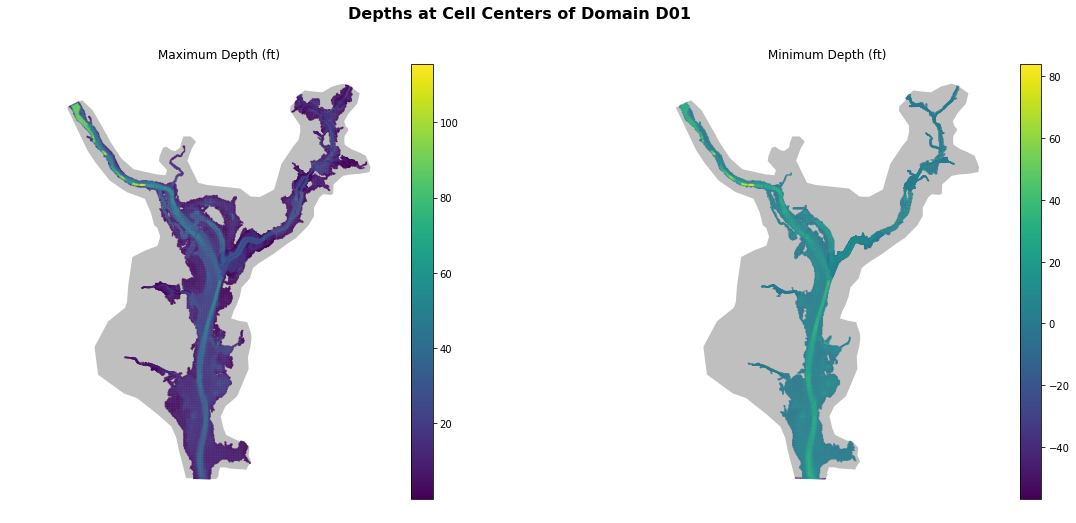

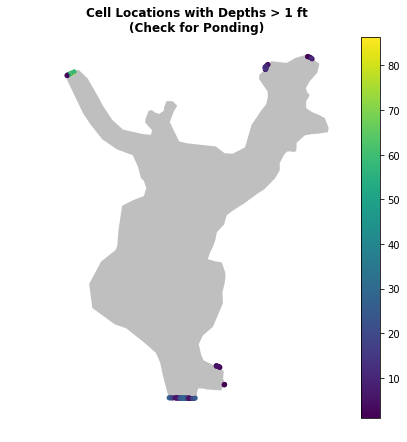

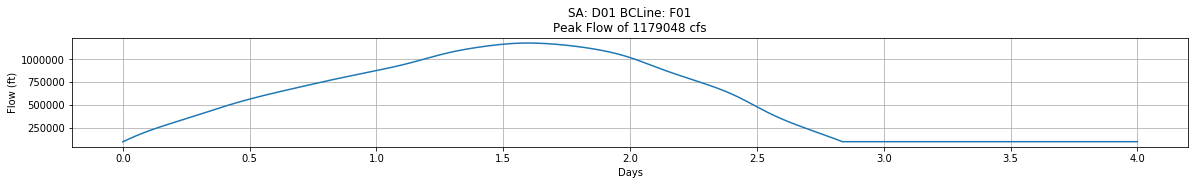

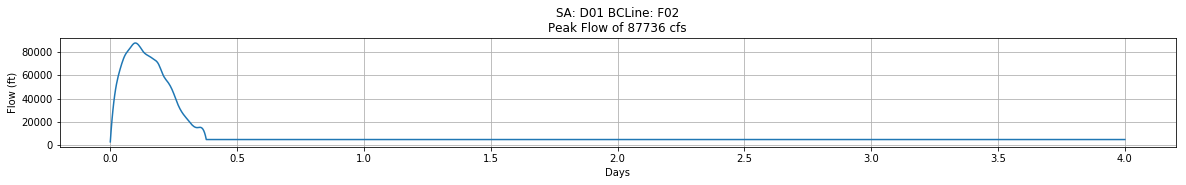

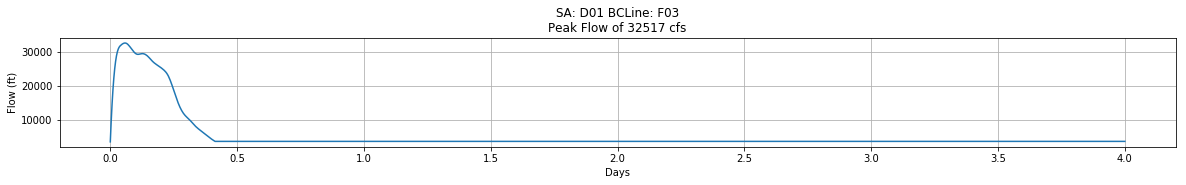

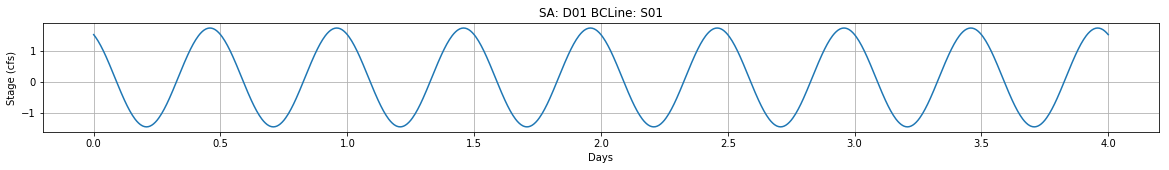

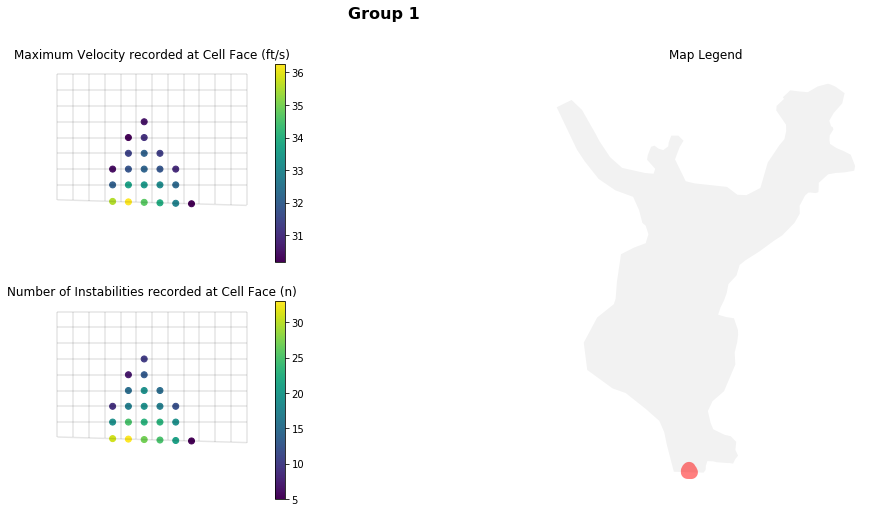

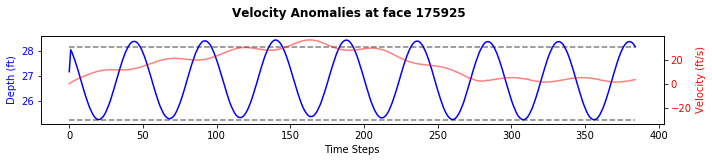

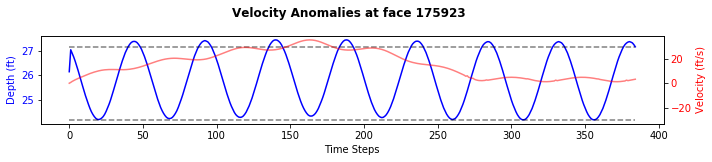

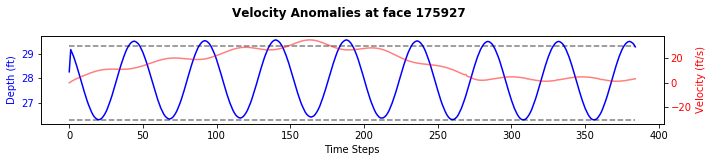

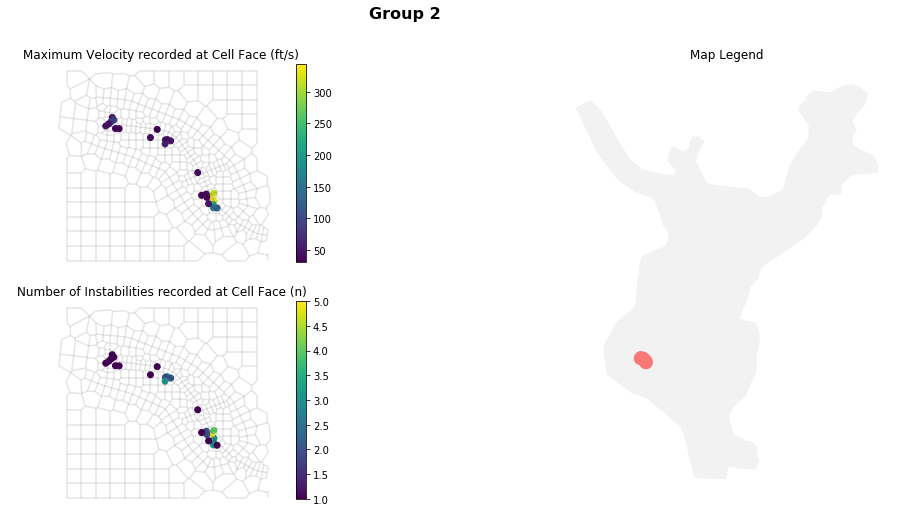

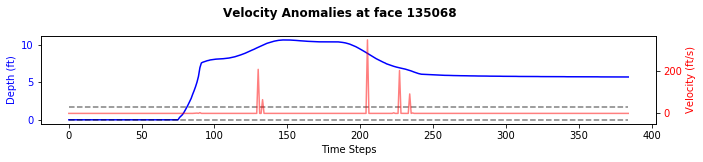

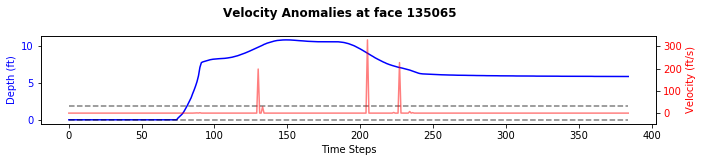

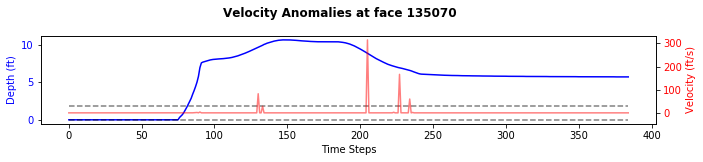

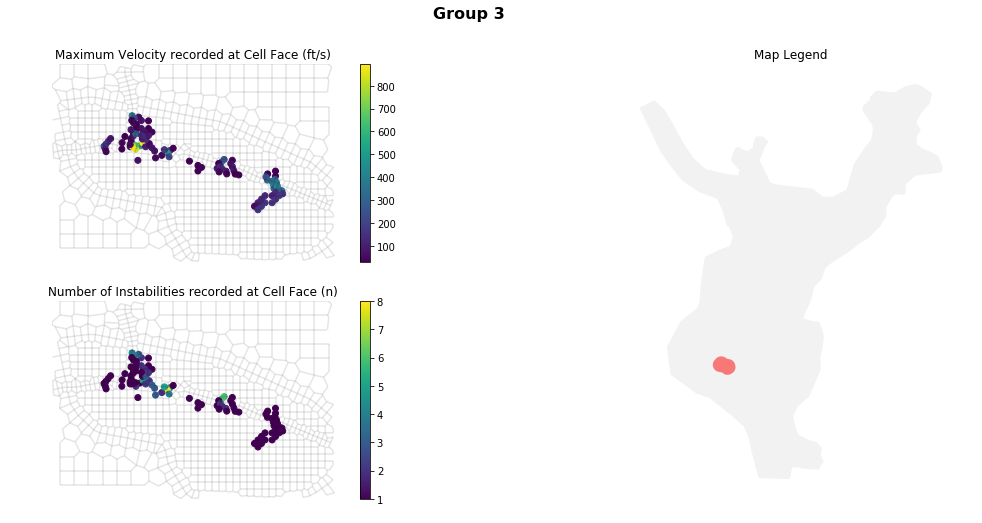

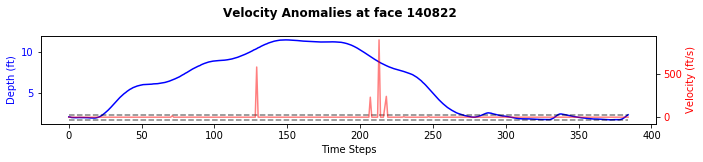

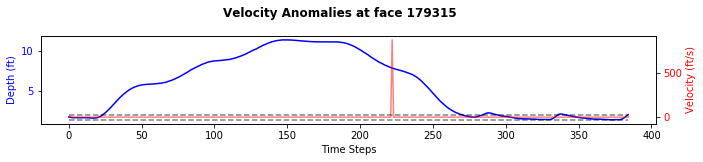

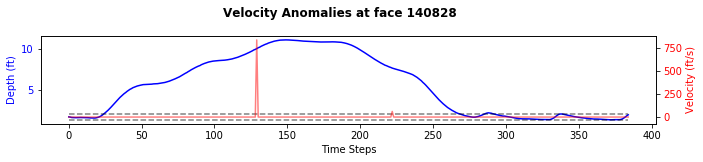

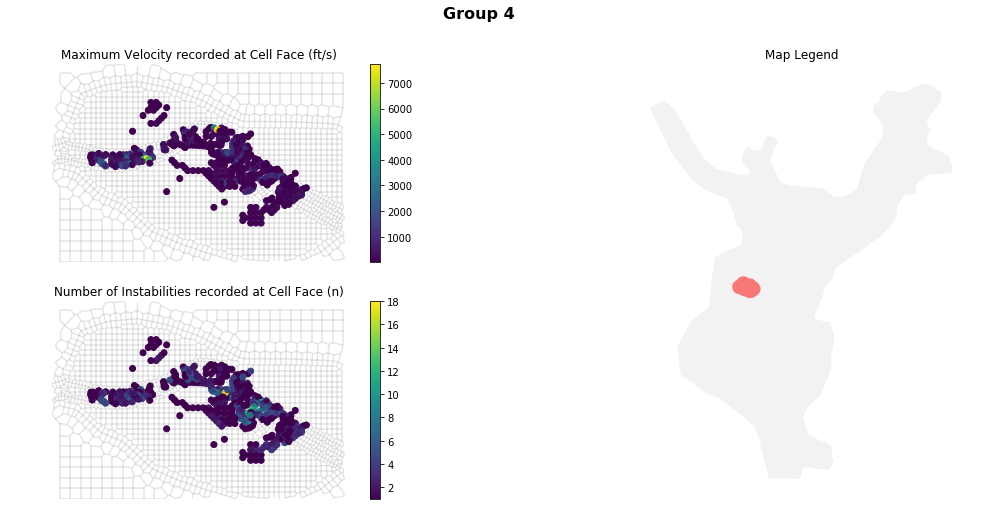

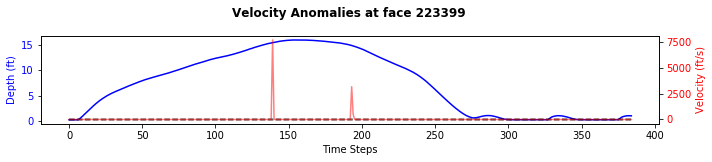

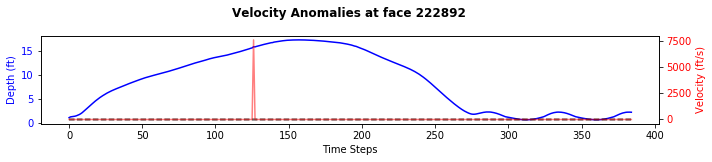

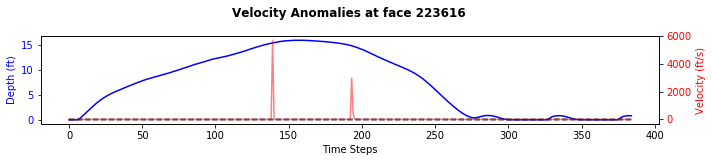

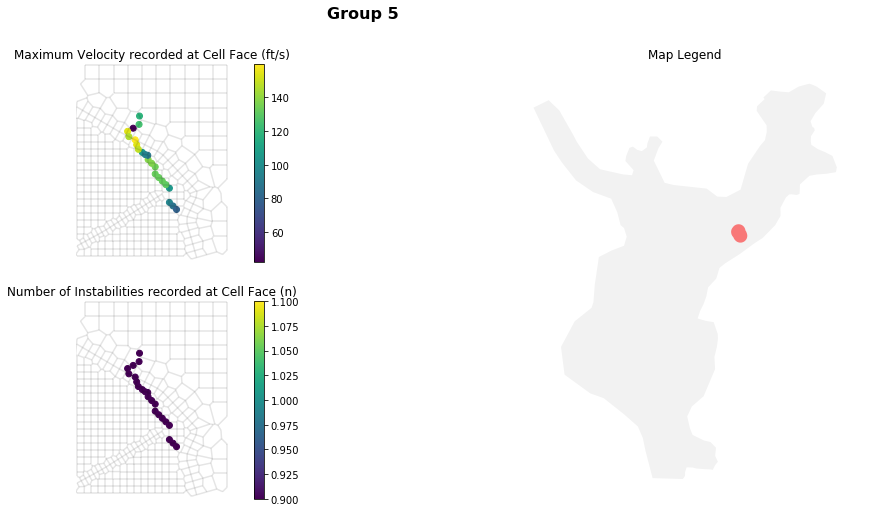

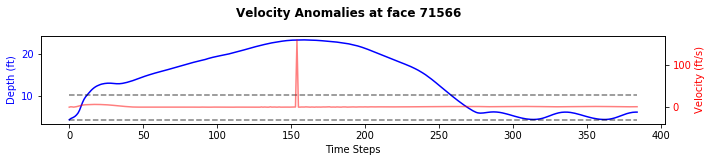

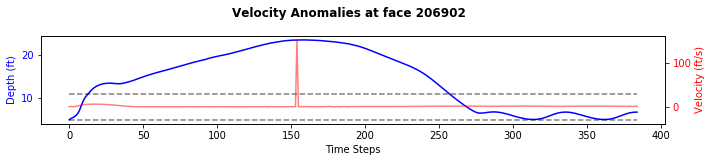

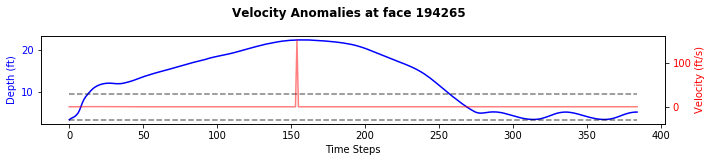

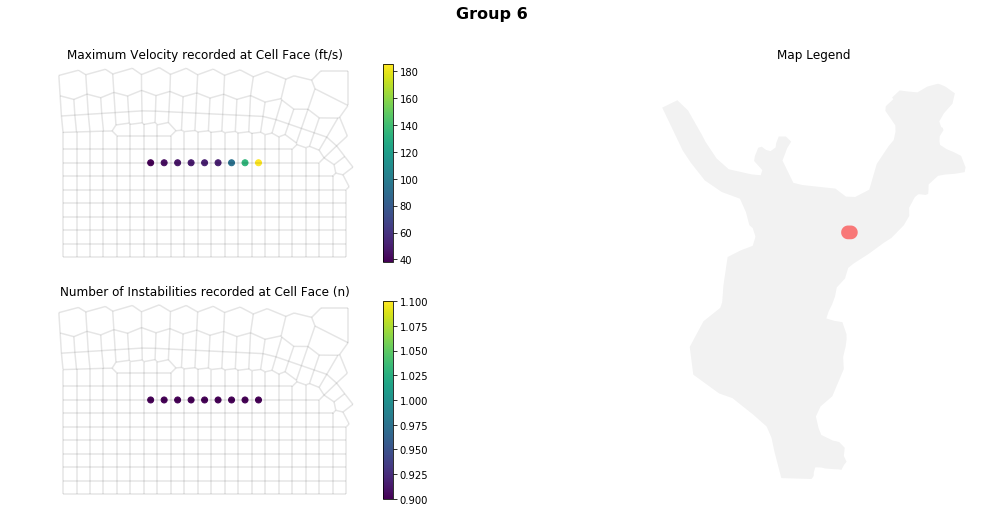

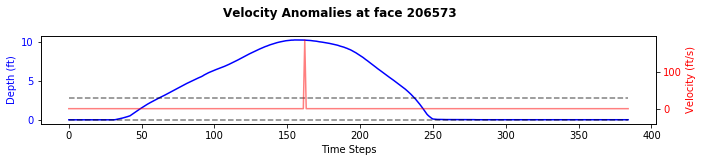

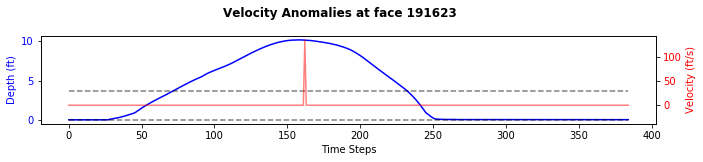

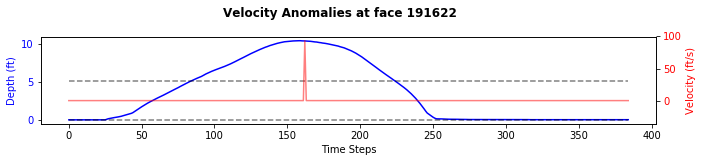

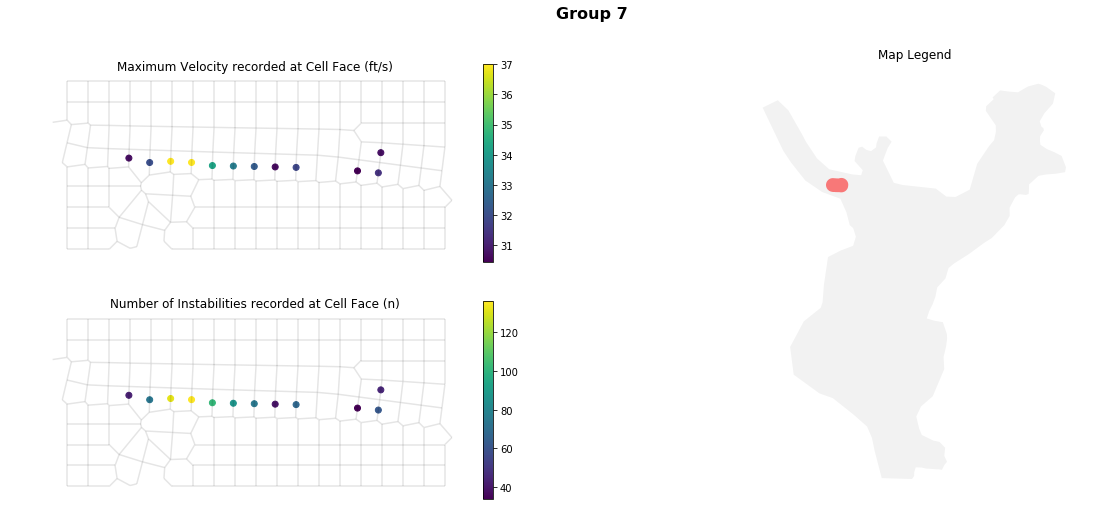

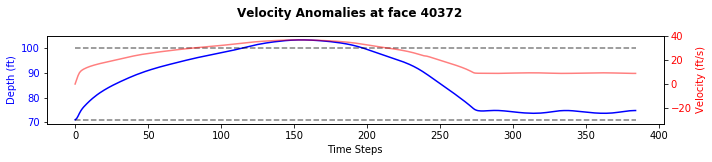

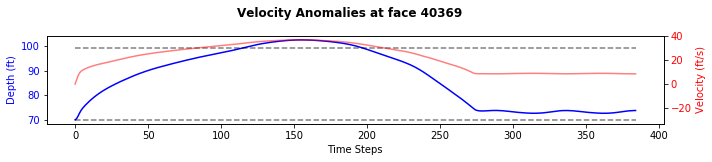

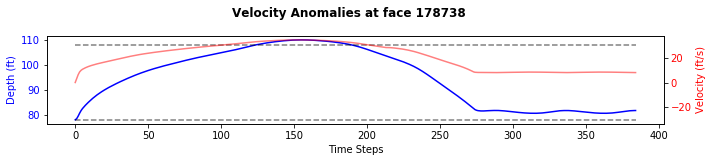

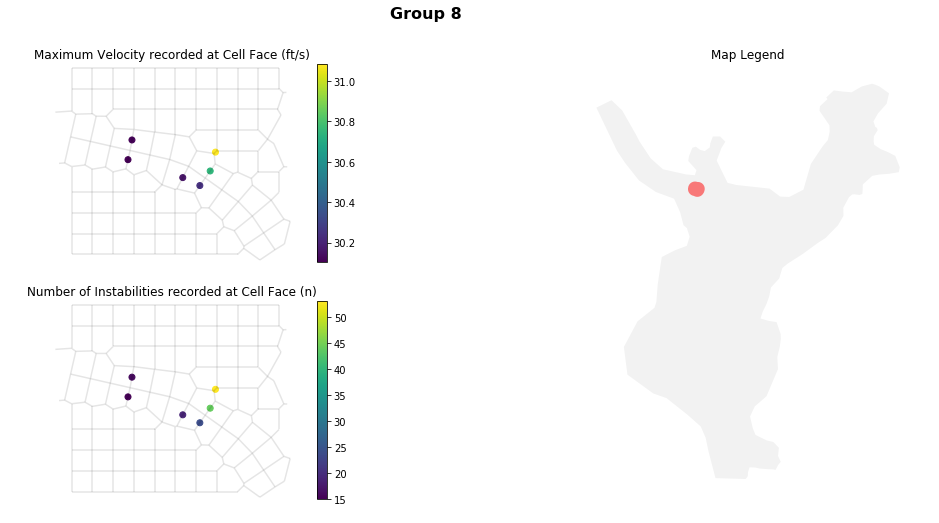

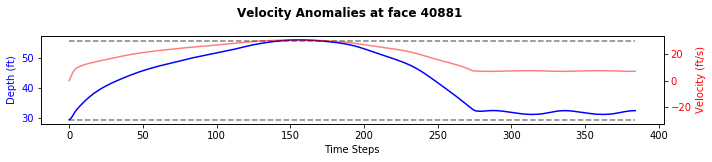

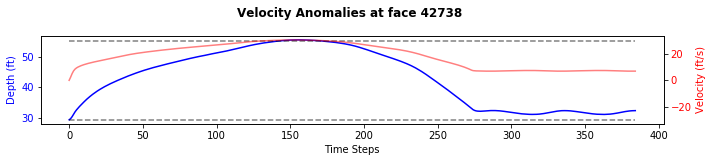

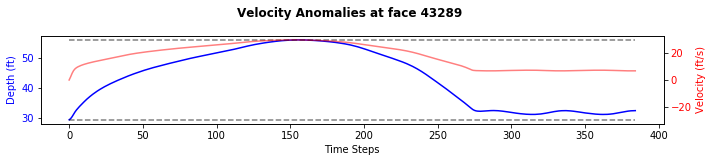

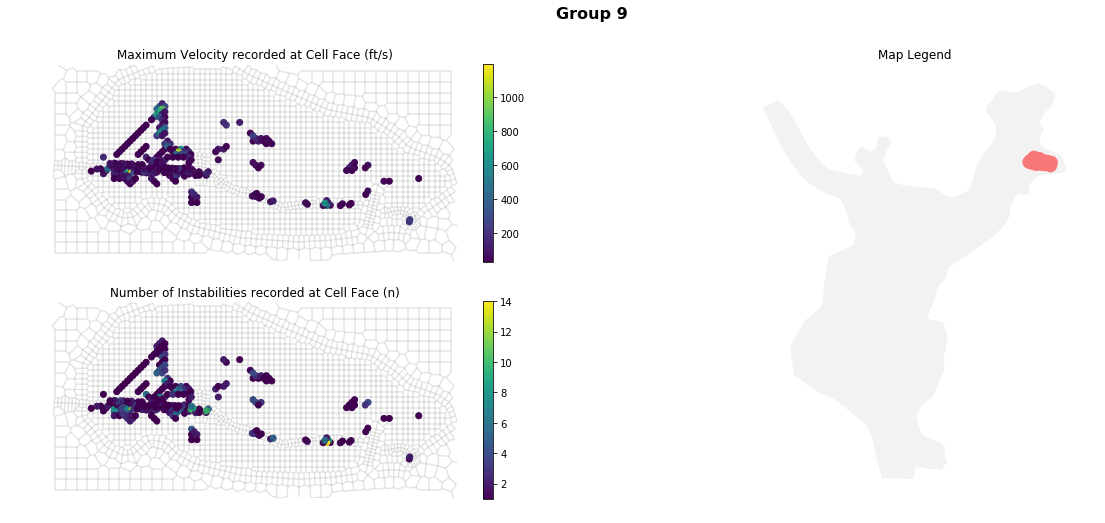

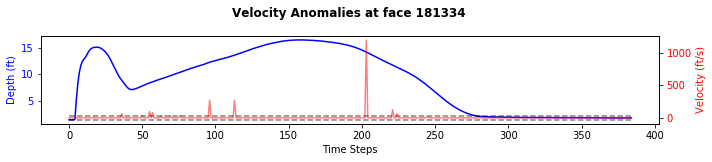

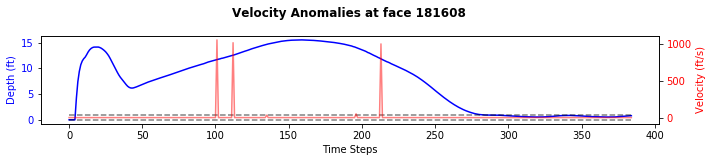

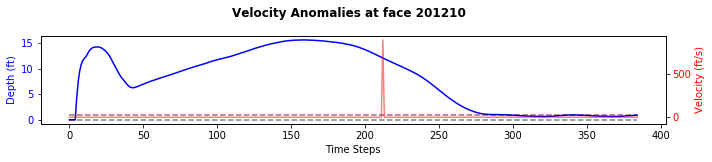

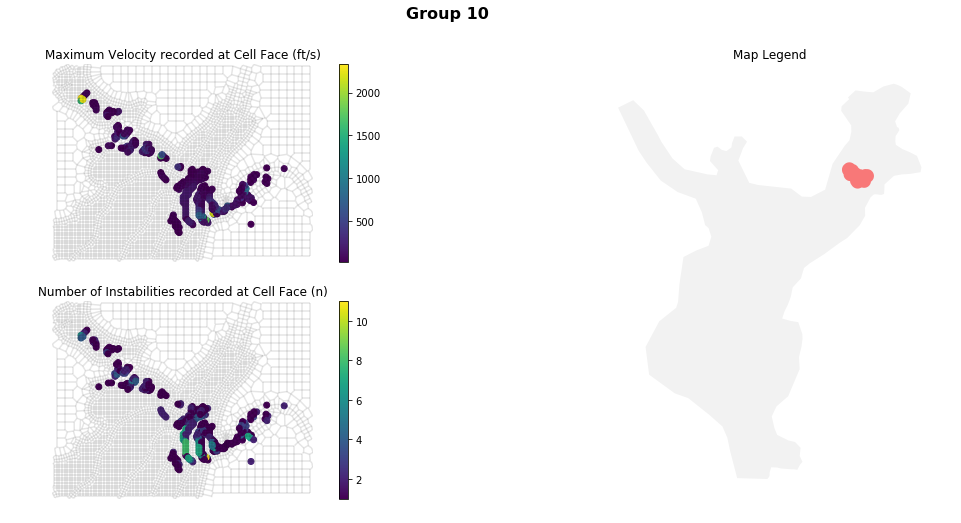

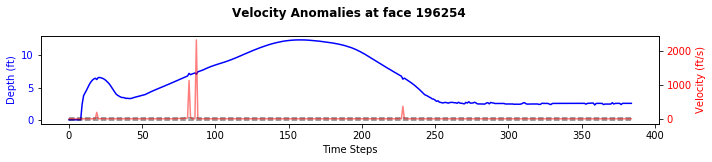

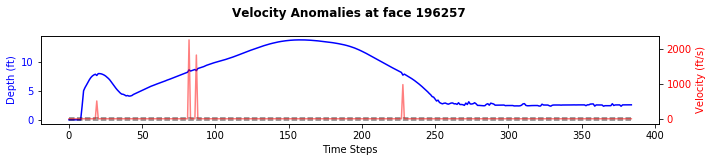

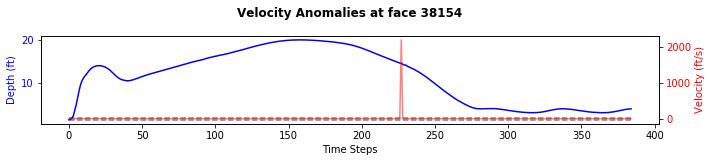

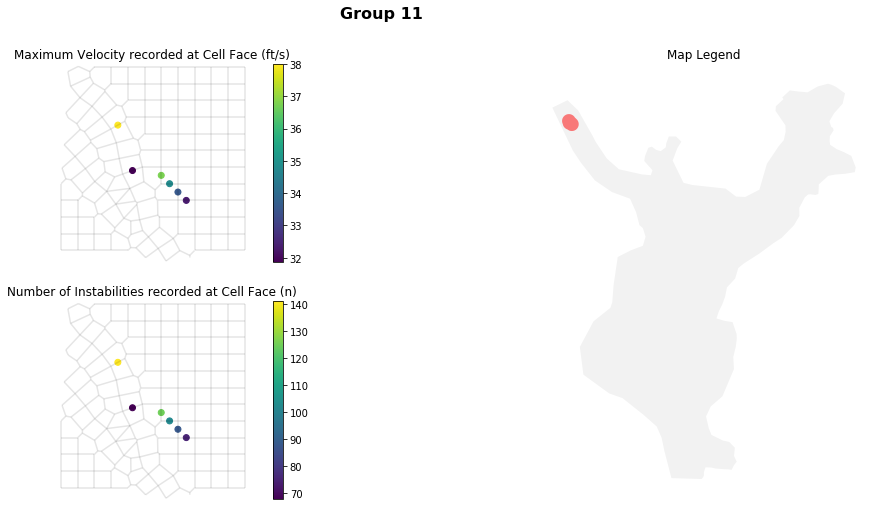

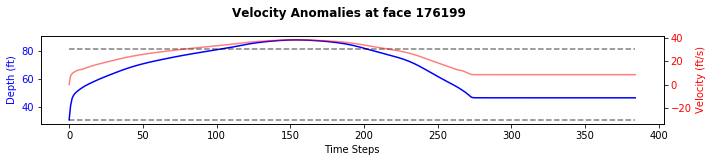

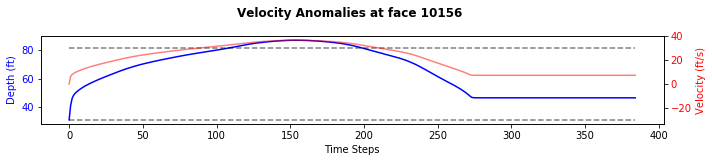

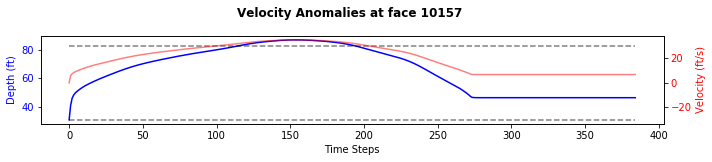

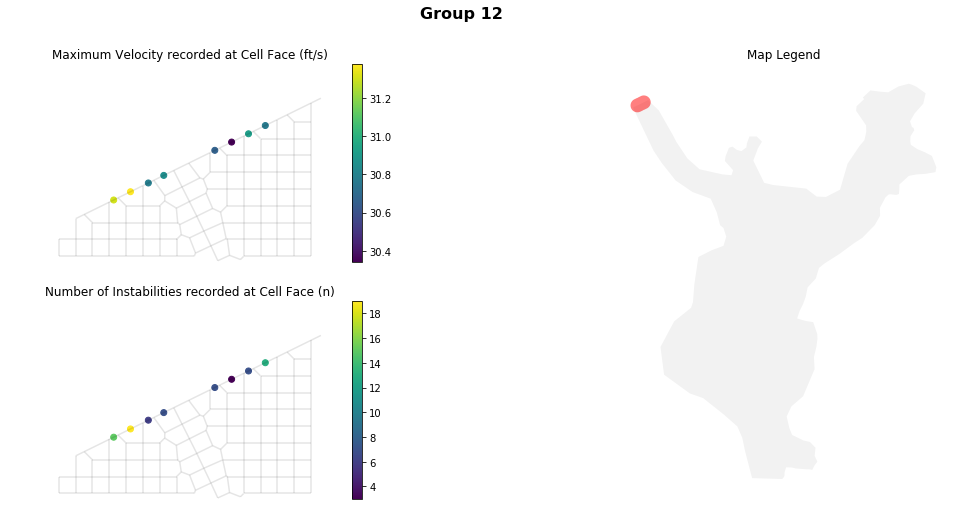

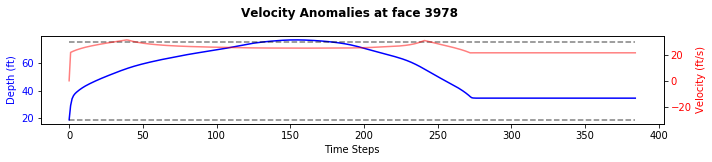

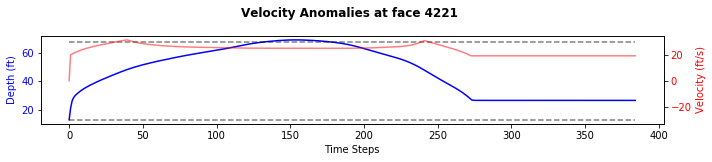

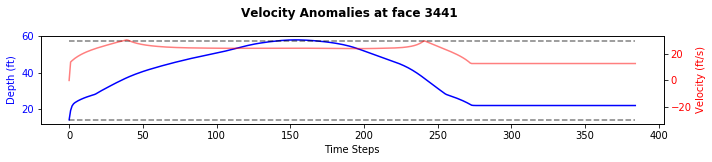

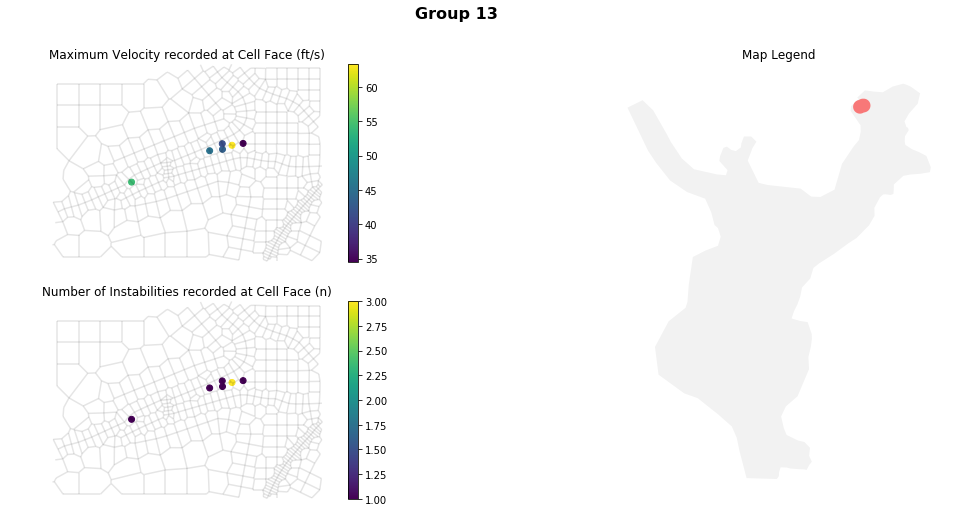

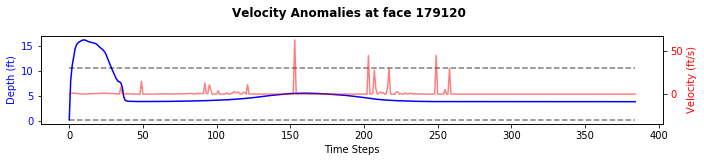

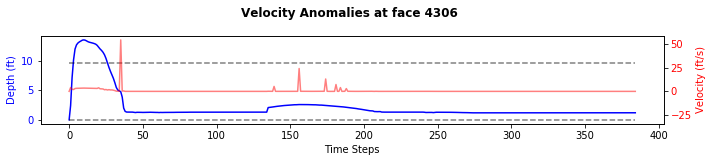

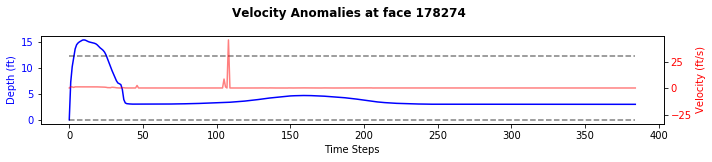

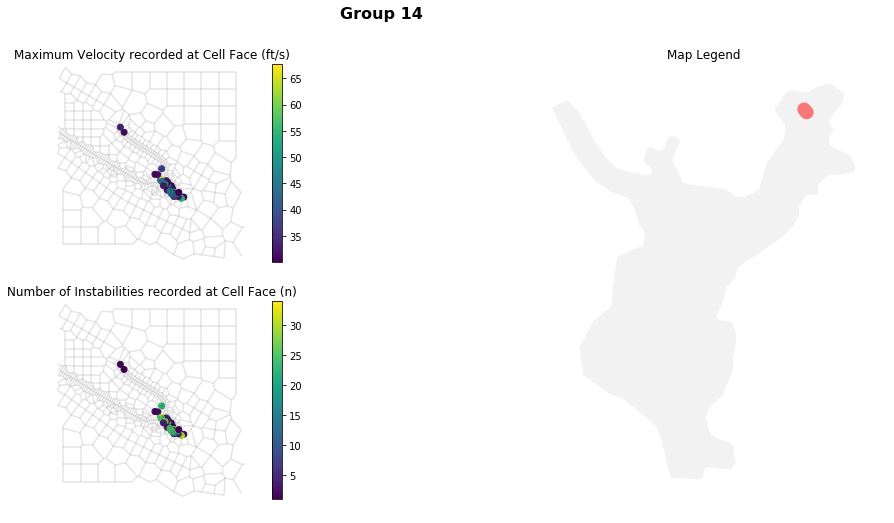

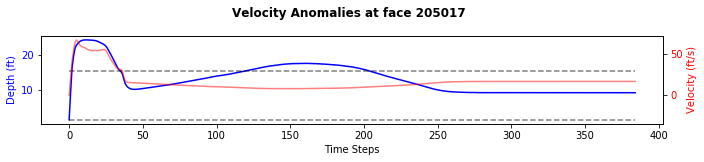

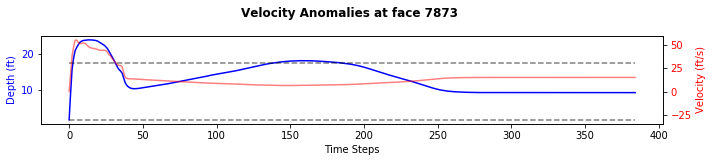

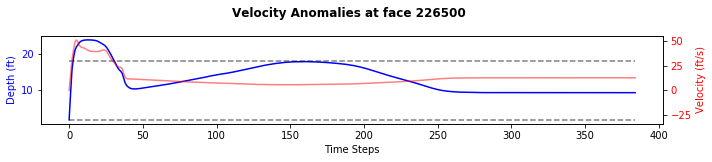

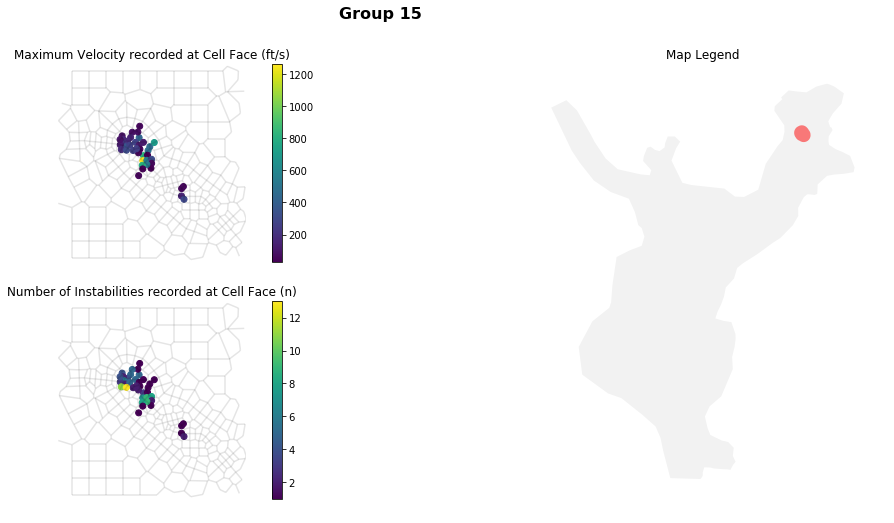

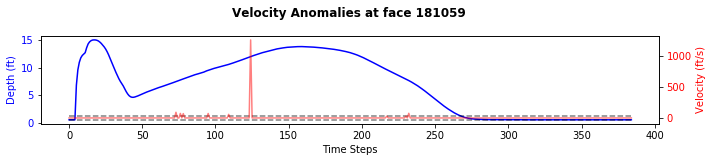

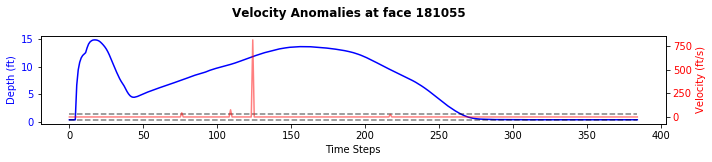

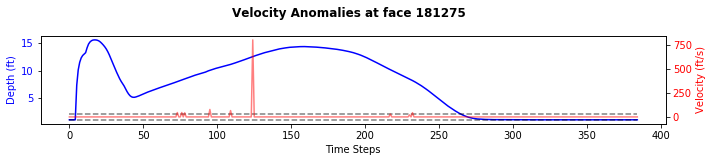

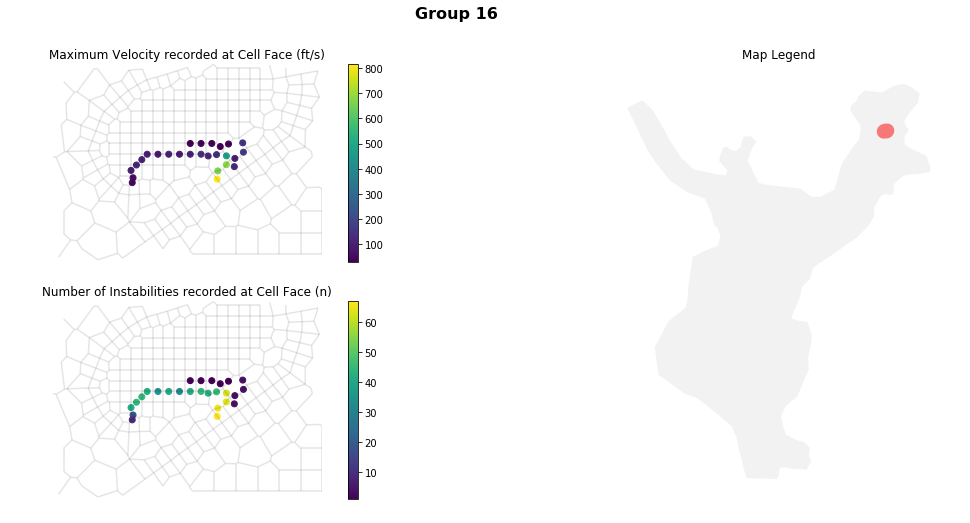

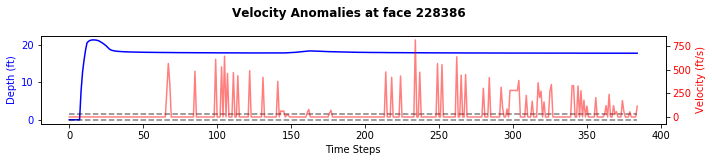

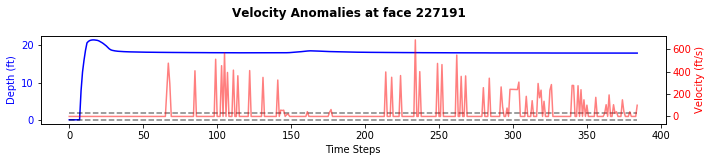

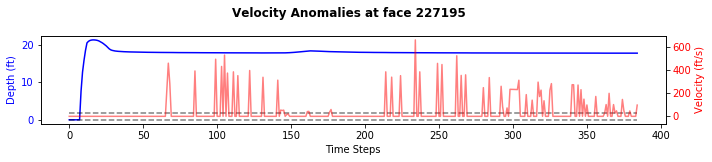

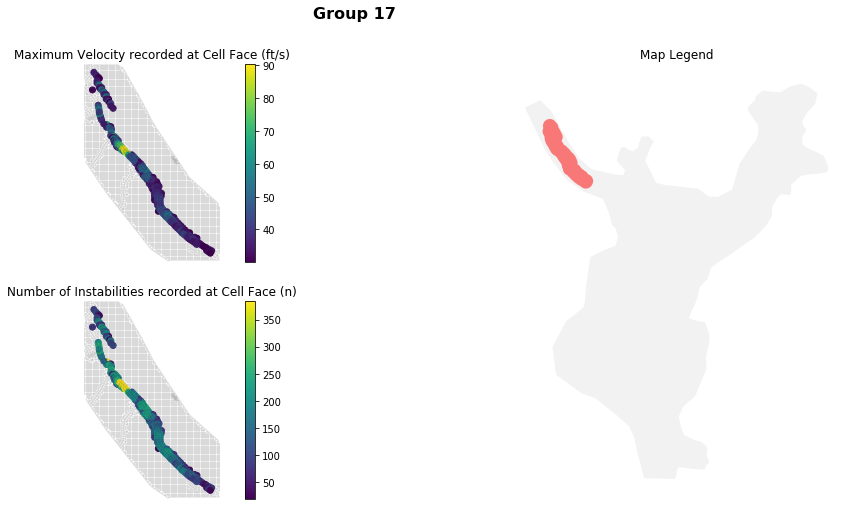

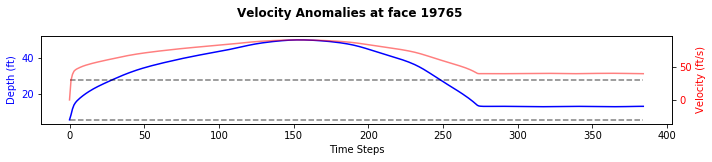

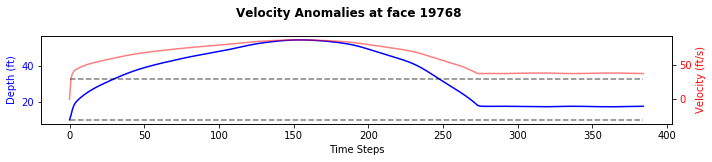

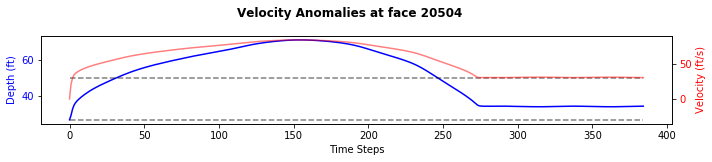

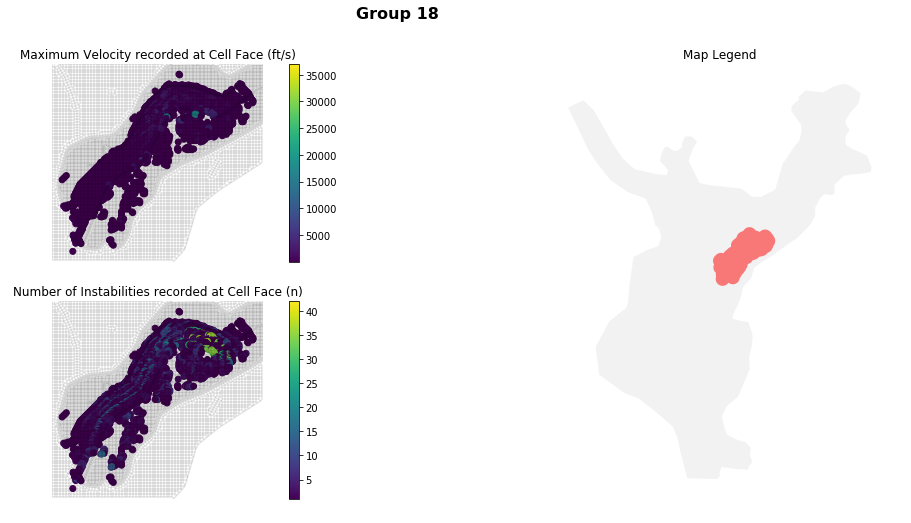

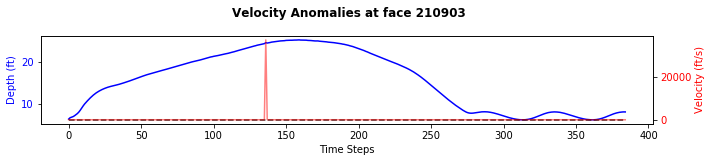

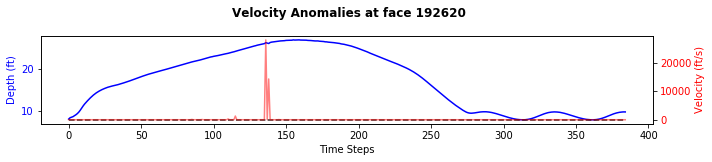

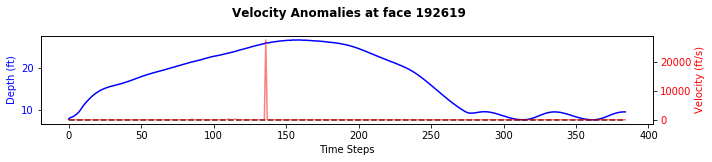

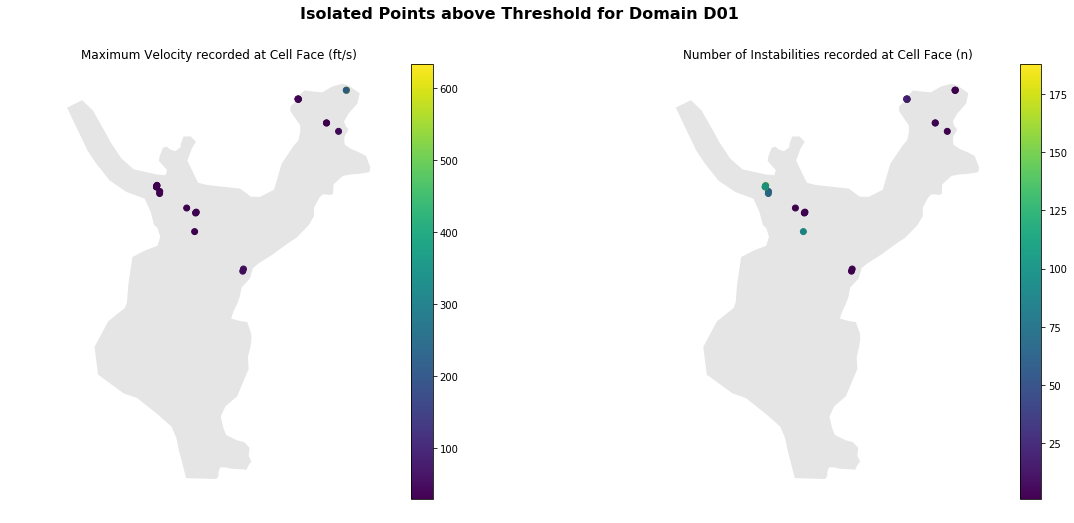

In [8]:
results_data = show_results(rasPlan.domains, model, rasPlan)
sb.glue(results_data.to_json(), "json")

### 2A. Computational Summary

In [9]:
non_nan = rasPlan.summary.replace(np.nan, "00:00:00")
sb.glue(non_nan.to_json(), "json")
rasPlan.summary

,Results
Computation Time DSS,00:00:00
Computation Time Total,03:55:48
Maximum WSEL Error,0
Run Time Window,15JUL2019 17:03:30 to 15JUL2019 20:59:17
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Vol Accounting,Volume Accounting in Acre Feet
Vol Accounting 2D Bdry,0
Vol Accounting Cell End,107467


# END